<div style="color:#00BFFF">

# Nowcasting Consumer Expenditure: 

<div style="color:#00BFFF">

### Introduction:  Uncovering Reliable Proxies for Consumer Spending Behaviour. 

**1.1. Introduction: The Problem (Why)**

The current quarterly GDP reports lag in reflecting the dynamic changes in the economy, impacting decision-makers who rely on timely economic data. This project is devised to mitigate this issue by identifying high-frequency, readily updated data proxies that offer quicker insights into consumer expenditure patterns.

**1.2. Project Scope and Objectives (What)**

The project's primary objective is to systematically identify, harmonise, and validate high-frequency data sources as proxies for real-time tracking of consumer expenditure in the United States. The goal is to refine these proxies to provide more immediate data on consumer spending habits, thus bridging the gap caused by the delayed reporting of official GDP figures.

**Key Questions:**

- Which high-frequency data sources can serve as accurate proxies for consumer spending?
- How can we validate these proxies against established measures of consumer expenditure?
- What techniques can we employ to ensure these proxies offer immediate and reliable insights into current consumer spending trends?
- How will we address potential discrepancies between different data sources in terms of scale, units, or reporting standards?
- Are there any unforeseen challenges in harmonizing data frequencies (monthly vs. quarterly) that could impact the accuracy of our analysis?
- How can we ensure the economic relevance of our findings, beyond statistical correlations?
- What contingency plans do we have for dealing with data anomalies or irregularities that might skew our analysis?

**1.3. Methodology**

The methodology is designed to focus on data preparation and validation:

- **Exploratory Data Analysis (EDA)**: To understand the characteristics and quality of the high-frequency monthly indicators and their initial relationships to consumer spending.
- **Proxy Validation**: To establish a correlation with established measures of consumer spending through statistical analysis, ensuring that the proxies are reliable and relevant.

**1.4. Assumptions**

**Data Quality and Relevance:** We operate under the assumption that the high-frequency data from FRED and other sources accurately reflect current economic trends and consumer sentiments. However, there is an inherent risk of data bias or inaccuracy, which could impact the reliability of our findings.

**Predictive Power and Relevance:** While we aim to identify effective proxies for consumer expenditure, there's a risk that these proxies may not fully capture the complexities of consumer behaviour or may not adapt swiftly to sudden economic shifts.

**External Factors:** The project also assumes a stable economic environment. Sudden external shocks (like global events or policy changes) could significantly affect consumer behaviour, potentially reducing the predictive accuracy of our proxies.  

<div style="color:#00BFFF">

### Setup Environment and import libraries

In [1]:
# Run the imports file
%matplotlib inline

In [2]:
# ------- Standard Library Imports -------
import warnings
from datetime import datetime
from pprint import pprint
from typing import List

# ------- Third-Party Library Imports -------
import pandas as pd
from pandas import NaT
import numpy as np

# Utility and display modules
from IPython.display import display, HTML

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Remove warnings
warnings.filterwarnings('ignore')

# Set the display options
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  

/var/folders/30/bhymp02j1fb47cmvs80_1b4m0000gn/T/ipykernel_74987/2839693654.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#load data generated from [1]M1_clean_and_preprocess.ipynb

#open defn
defn = pd.read_csv('./results/fred/fred_indicator_mappings.csv',index_col=0)

#open joined_dataset.csv
joined_dataset = pd.read_csv('./results/merged_data/joined_dataset_transformed.csv', index_col=0,parse_dates=False)

In [4]:
joined_dataset.tail()

,PCE,Real Personal Income,IP Index,IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Initial Claims,Housing Starts: Total New Privately Owned,New Private Housing Permits (SAAR),Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Nonrevolving consumer credit to Personal Income,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,"Crude Oil, spliced WTI and Cushing",CPI : All Items,Personal Cons. Expend.: Chain Index,Securities in Bank Credit at All Commercial Banks,Primary_Sector_Employment,Secondary_Sector_Employment,Tertiary_Sector_Employment,Public_Sector_Employment,Avg_Hourly_Earnings_Employment,Avg_weekly_hours_Employment,Output: Consumer_Goods_Index,Output_Materials_Index,IP_Prod_Equipment_Index,IP_Final_Products_Index,Short_Term_Rate_Index,Long_Term_Rate_Index,Spread_Index,Credit_Market_Index,Stock_Market_Performance_Index,Stock_Market_Valuation_Index,Consumer_Spending_Index,Producer_Price_Index,Consumer_Credit_Index,Consumer_Demand_Composite_Index,New_Orders_Index
2022-07-01,0.053922,0.039554,0.031574,0.153330,0.063883,NaN,NaN,0.017555,0.026273,-0.06065,-0.284934,-0.150074,-0.255462,-0.294251,0.333390,NaN,NaN,-0.057652,-0.094878,0.104879,0.084280,-0.042539,0.002492,0.091596,-0.201871,0.330313,-1.038032,0.022319,0.026047,NaN,0.040970,0.149644,0.112725,0.028623,0.046360,0.051554,-0.004363,0.011899,0.035029,0.020953,0.461724,0.220179,-0.163544,-0.079116,-0.049724,-0.010560,0.007675,-0.237728,0.014662,-0.014173,0.202910
2022-10-01,0.046648,-0.000721,-0.076628,-0.256415,-0.474707,NaN,NaN,0.011160,0.013711,0.00000,-0.094978,0.114914,-0.276316,-0.466115,0.166695,NaN,-0.030726,-0.071940,-0.023573,0.073534,0.105269,0.035005,-0.033519,-0.082234,0.173609,0.151882,-0.265448,0.030207,0.032885,NaN,0.110472,0.104019,0.051814,0.021186,0.057934,-0.579069,-0.025620,-0.147467,-0.071431,-0.030432,0.339752,0.095887,-0.803614,-0.273072,0.055133,0.046424,0.005536,-0.097007,0.036733,-0.048428,0.326940
2023-01-01,0.070653,0.037935,0.044038,0.083194,0.133974,NaN,NaN,0.054104,0.051466,0.00000,0.000000,0.179517,0.059955,0.072912,0.083348,NaN,-0.088843,-0.141323,0.147794,-0.015318,0.042929,-0.113842,-0.004903,-0.012287,-0.008479,0.060506,-0.107266,0.034730,0.037592,-0.109841,0.046823,0.024860,0.076296,0.052738,0.052988,0.098681,-0.001169,0.105995,0.009818,-0.003967,0.107921,0.010941,-0.401831,-0.034648,0.079464,0.059455,0.024802,-0.126471,0.033787,-0.005528,-0.239927
2023-04-01,0.029936,0.005394,-0.013462,0.029509,-0.048231,NaN,-0.393657,0.009913,0.006079,0.06065,0.162819,0.084327,0.099057,0.010416,0.000000,NaN,-0.003960,-0.033318,0.007042,-0.041770,0.016582,-0.049058,-0.020176,0.075595,0.098715,-0.245111,-0.102853,0.025056,0.021976,-0.122843,0.049017,0.046202,0.032279,0.018706,0.048767,0.144420,-0.038621,0.002687,-0.000748,-0.022393,0.123578,0.079470,-0.085145,-0.049476,0.398264,0.093953,0.011375,-0.049392,0.069069,0.000752,1.230694
2023-07-01,0.052198,0.004654,0.038788,0.109389,0.033638,0.10177,-0.163162,0.028683,0.018439,0.12130,0.094978,-0.262702,-0.161619,0.078120,-0.333390,NaN,-0.018255,-0.070817,-0.025431,0.001760,0.032889,-0.136982,-0.000643,0.063736,-0.049660,0.151265,0.651061,0.044861,0.033266,-0.081312,0.014632,0.037373,0.064328,0.046202,0.047475,-0.092867,0.063920,0.031130,0.014719,0.035022,0.055409,0.148903,0.022835,0.117667,0.063563,NaN,0.020181,0.134264,0.043464,0.096264,-0.161658


<div style="color:#00BFFF">

### Exploratory Data Analysis (EDA)

<div style="color:#00BFFF">

#### Create data frame to hold most positively and negatively correlated indicators

In [5]:
def calculate_sorted_correlations(dataset, target_column):
    """
    Calculate Pearson correlations of all columns in the dataset with a target column,
    sort them by the absolute value of the correlation, and return as a Series while retaining
    the original positive or negative signs.

    :param dataset: Pandas DataFrame containing the data
    :param target_column: String, the name of the column to correlate with
    :return: Pandas Series with sorted correlations
    """
    # Ensure the index is in datetime format
    dataset.index = pd.to_datetime(dataset.index)

    # Calculate Pearson correlation with target column
    correlation_with_target = dataset.corrwith(dataset[target_column],method='pearson')

    # Sort the correlations by absolute value, but retain the original values
    sorted_correlations = correlation_with_target.reindex(correlation_with_target.abs().sort_values(ascending=False).index)

    # Return the sorted correlations as a Series
    return sorted_correlations

# Initial calculation
top_correlations = calculate_sorted_correlations(joined_dataset, 'PCE')

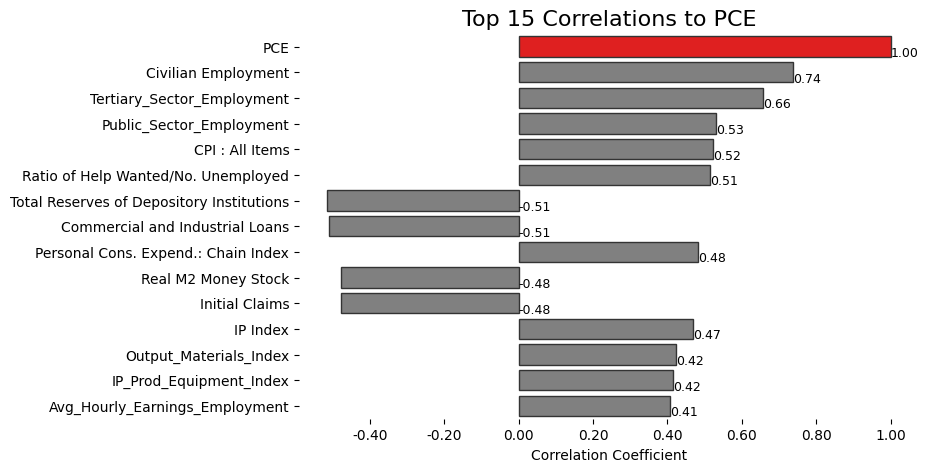

In [6]:
def plot_top_correlations(top_cor,n = 15):
    # Convert the Series to a DataFrame for plotting and sort by the absolute values
    top_correlations_df = top_cor.head(n).reset_index()
    top_correlations_df.columns = ['Indicator', 'Correlation']
    top_correlations_df['AbsCorrelation'] = top_correlations_df['Correlation'].abs()
    top_correlations_df = top_correlations_df.sort_values(by='AbsCorrelation', ascending=False)

    # Set the color for each bar based on correlation value
    colors = ['grey' if (x < max(top_correlations_df['AbsCorrelation'])) else 'red' for x in top_correlations_df['Correlation']]

    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(8, 5))

    # Plot the correlations using the original Correlation values, not the absolute ones
    sns.barplot(x="Correlation", y="Indicator", data=top_correlations_df,
                palette=colors, edgecolor=".2")

    # Customize the aesthetics
    sns.despine(left=True, bottom=True)
    ax.set_xlabel('Correlation Coefficient')
    ax.set_ylabel('')
    ax.set_title('Top 15 Correlations to PCE', fontsize=16)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))

    # Optional: Add value labels to each bar for direct reading
    for i, v in enumerate(top_correlations_df['Correlation']):
        ax.text(v if v > 0 else 0, i + .25, f'{v:.2f}', color='black', va='center', fontsize=9)

    plt.show()
    
plot_top_correlations(top_correlations)

<div style="color:#00BFFF">

#### Overlaid temporal line graph

</div>

In [8]:
## this will also be used to iterate back to the log transformation to possibly correct indicators.

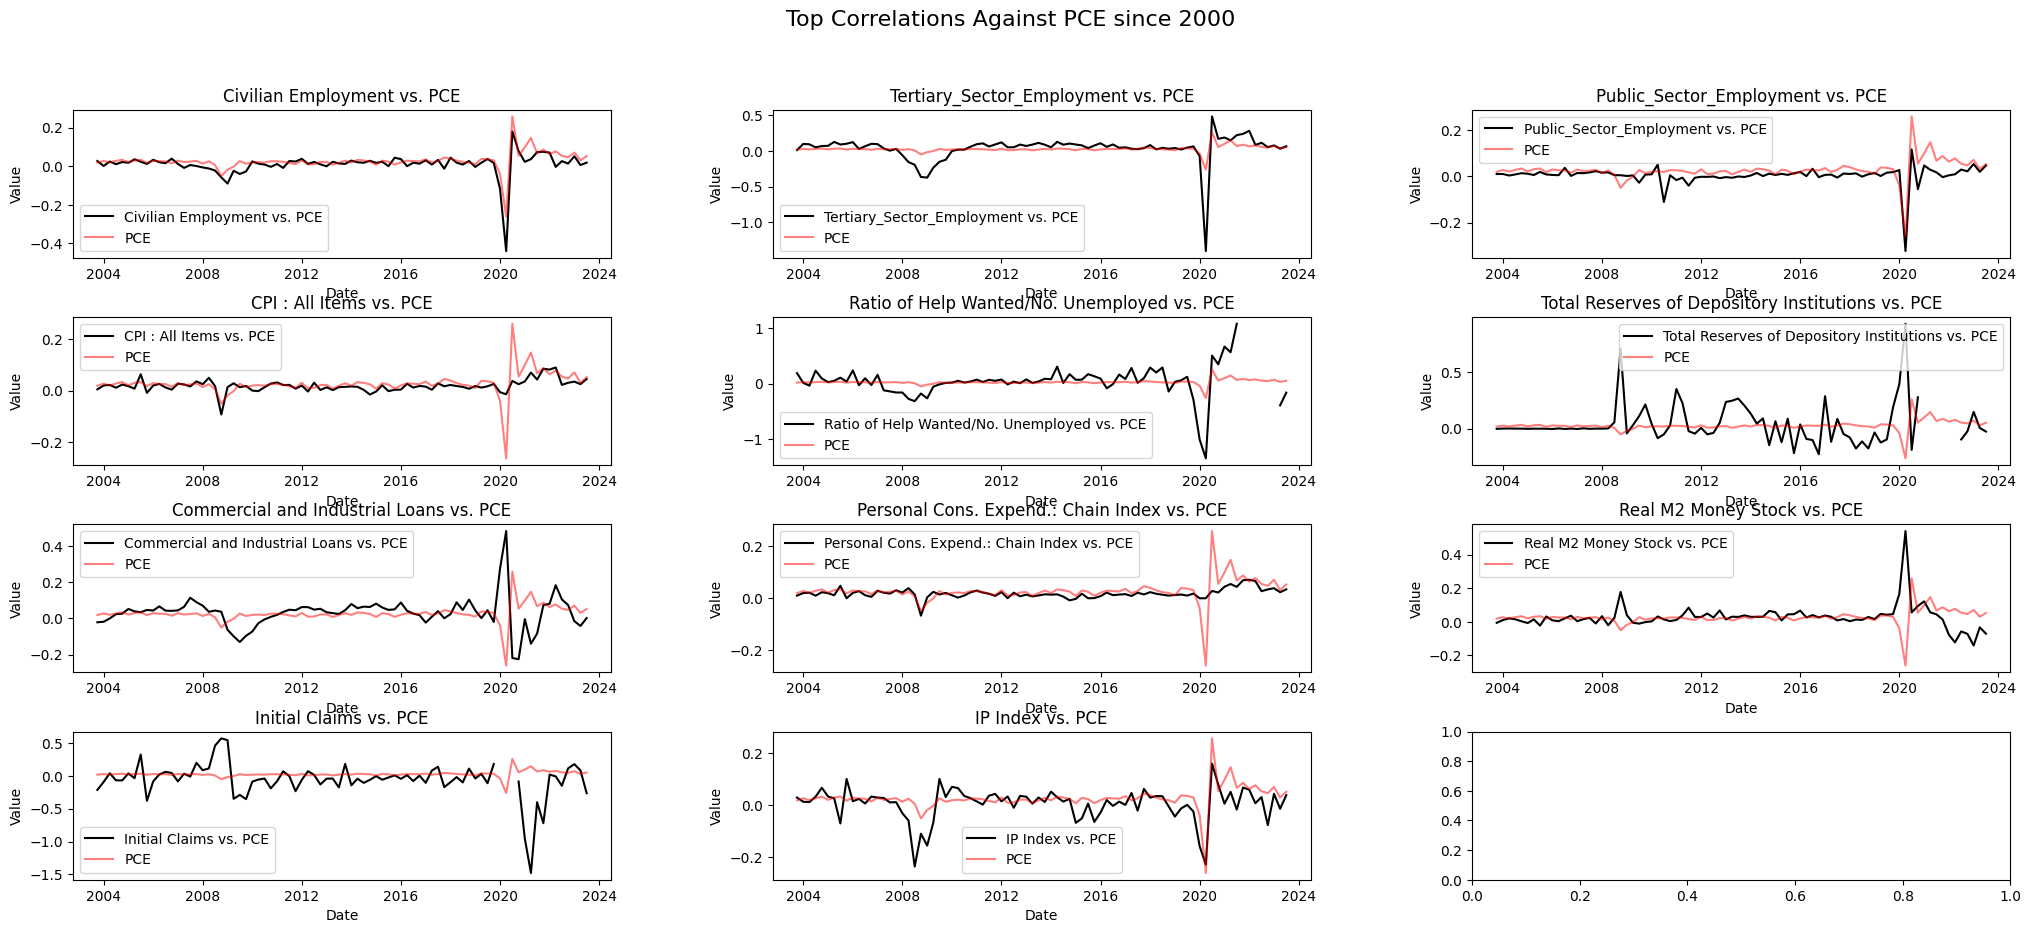

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# Extract the top 10 correlated features excluding 'PCE'
top_features = [feature for feature in top_correlations.index[:12] if feature != 'PCE']

# Setup the figure and subplots
fig, axs = plt.subplots(4, 3, figsize=(25, 10))  # Adjust figsize as needed
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust spacing as needed

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot each feature in its subplot against PCE
for i, feature in enumerate(top_features):
    # Plotting feature against PCE
    axs[i].plot(joined_dataset.index[-80:], joined_dataset[feature][-80:], label=f'{feature} vs. PCE',color='black')
    axs[i].plot(joined_dataset.index[-80:], joined_dataset['PCE'][-80:], label='PCE', color='red',alpha=0.5)
    axs[i].set_title(f'{feature} vs. PCE')
    axs[i].set_xlabel('Date') 
    axs[i].set_ylabel('Value')
    axs[i].legend()

# Ensure we only use the subplots needed for the top features
for j in range(i + 1, 10):
    fig.delaxes(axs[j])

# Add an overall title
fig.suptitle('Top Correlations Against PCE since 2000', fontsize=16)

# Show the plot
plt.show()


<div style="color:#00BFFF">

#### Descriptive statistics

</div>

In [10]:
# Descriptive statistics for the joined_dataset
# joined_dataset[top_bottom_20.index].describe()

<div style="color:#00BFFF">

### Comparative and Temporal Analysis

</div>

Undertaken after correlation analysis to delve deeper into the dynamics of the relationships between consumer spending and the identified proxies, providing insights into potential causative or predictive trends.

<div style="color:#00BFFF">

##### Inspecting for multicolinearity: Displaying Correlations heatmap and Testing for multicolinearity


When using multiple indicators, there's a risk of multicollinearity, where indicators are highly correlated with each other. This can distort the importance of individual variables in a regression model.

Inspecting a correlation matrix or heatmap can visually reveal if any two variables are highly correlated, which might suggest multicollinearity.

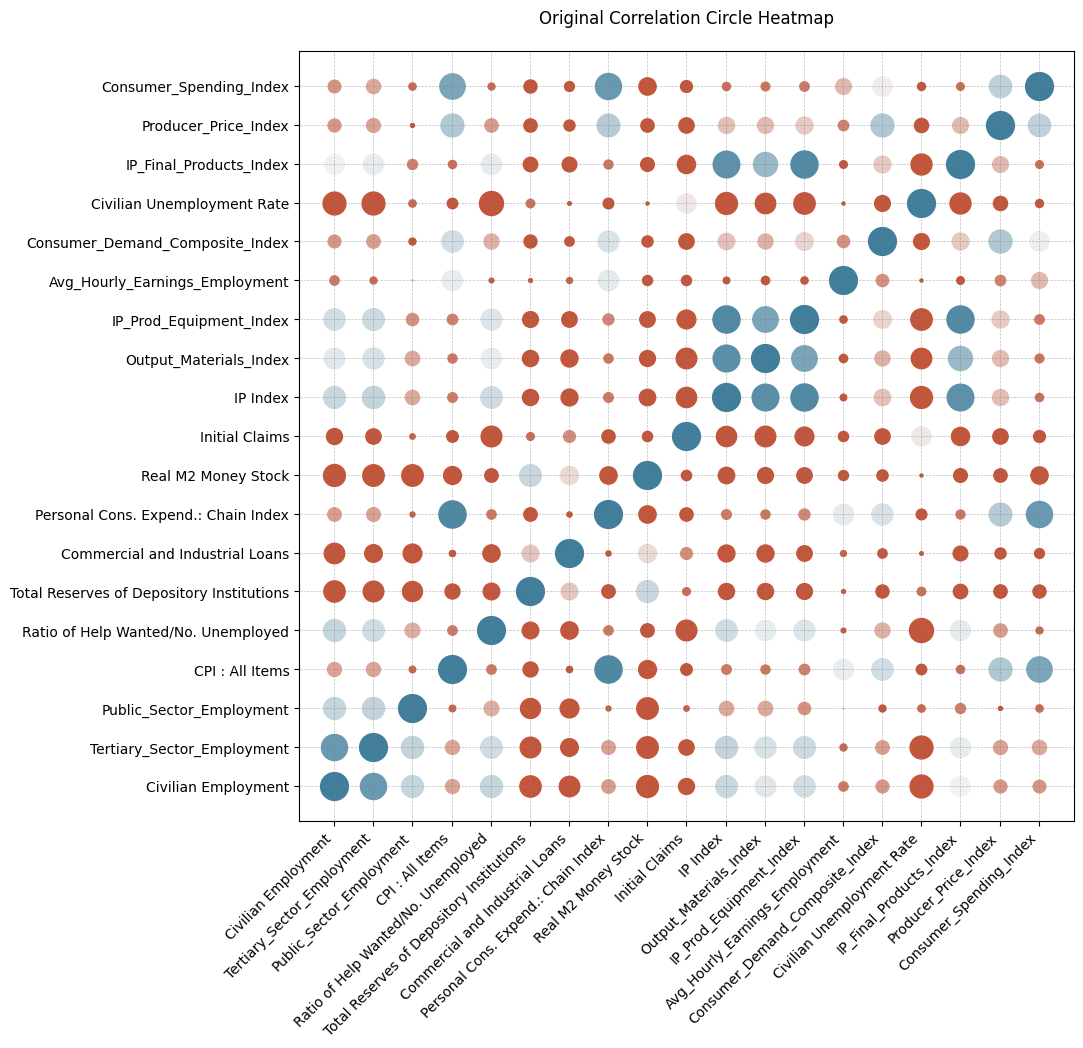

In [25]:
def plot_correlation_circle_heatmap(dataset, correlations, top_n=20, fig_title='Correlation Circle Heatmap'):
    """
    Plots a correlation circle heatmap for the top N indicators based on provided correlations.

    :param dataset: Pandas DataFrame containing the data.
    :param correlations: Pandas Series containing correlation values with index as indicators.
    :param top_n: Integer representing the top N indicators to plot.
    :param fig_title: String representing the title of the figure.
    """
    # Get the top N indicators (excluding 'PCE')
    top_indicators = correlations.head(top_n).index.drop('PCE')

    # Create a correlation matrix for the top N indicators
    correlation_matrix = dataset[top_indicators].corr()

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 10))

    # Generate a colormap
    cmap = sns.diverging_palette(20, 230, as_cmap=True)

    # Get the coordinates
    x_coords, y_coords = np.meshgrid(correlation_matrix.columns, correlation_matrix.index)

    # Get correlation values for size - scaled for visibility
    sizes = np.abs(correlation_matrix.values.flatten()) * 400

    # Get colors based on correlation values
    colors = [cmap(val) for val in correlation_matrix.values.flatten()]

    # Create the bubble heatmap
    for (x, y), size, color in zip(np.c_[x_coords.ravel(), y_coords.ravel()], sizes, colors):
        ax.scatter(x, y, s=size, c=[color])

    # Improve layout
    ax.set_xticks(np.arange(len(correlation_matrix.columns)))
    ax.set_yticks(np.arange(len(correlation_matrix.index)))
    ax.set_xticklabels(correlation_matrix.columns)
    ax.set_yticklabels(correlation_matrix.index)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    ax.set_title(fig_title, pad=20)
    
    # Adding a light grid
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)


    plt.show()
    
# Example usage with the original correlations
plot_correlation_circle_heatmap(joined_dataset, top_correlations, top_n=20, fig_title='Original Correlation Circle Heatmap')



In [12]:
refined_dataset = joined_dataset.copy()

#update the top_bottom_cor_refined
top_correlations_refined = calculate_sorted_correlations(refined_dataset, 'PCE')

<div style="color:#00BFFF">

### Linear Regression Analysis to Determine Variable Influence on PCE

<div style="color:#00BFFF">

##### Linear Regression Analysis

This section of the notebook conducts a linear regression analysis to explore how different variables in our dataset influence the Private Consumption Expenditure (PCE). The primary goal is to determine the strength of the linear relationship each variable has with PCE, quantified using the \( R^2 \) (coefficient of determination) metric.Variables with higher \( R^2 \) values are of particular interest as they may be key drivers of PCE variations.By understanding these relationships, we can better comprehend the dynamics influencing Private Consumption Expenditure, an essential component of economic analysis.

**Steps in the Analysis:**

1. **Data Preparation:**
   - We exclude 'PCE' from the list of independent variables as it is our dependent variable.
   - The dataset is cleaned to remove any rows with NaN or infinite values to ensure the validity of our regression analysis.

2. **Linear Regression:**
   - For each independent variable, we perform a simple linear regression against 'PCE'.
   - Only variables with a sufficient number of observations (set by `min_threshold`) are considered to ensure robust regression results.

3. **Calculation of \( R^2 \) Values:**
   - After fitting the model, we predict 'PCE' using each independent variable and compute the \( R^2 \) value.
   - The \( R^2 \) value indicates how much of the variance in 'PCE' is explained by the variable. A higher \( R^2 \) suggests a stronger explanatory power.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the independent variables (excluding 'PCE')
independent_vars = refined_dataset.drop(columns=['PCE']).columns

# Prepare the dependent variable 'PCE'
dependent_var = refined_dataset['PCE']

# Setting a minimum threshold for the number of observations required for regression
min_threshold = 30

# Dictionary to store R^2 values for each variable
r2_values = {}

# Perform linear regression for each independent variable
for var in independent_vars:
    # Drop rows where either the independent or dependent variable is NaN or infinite
    combined_data = refined_dataset[[var, 'PCE']].replace([np.inf, -np.inf], np.nan)#.dropna()
    
    #replace np.nan with 0
    combined_data = combined_data.dropna()

    if len(combined_data) >= min_threshold:
        # Prepare the data for regression
        X = combined_data[var].values.reshape(-1, 1)
        y = combined_data['PCE'].values

        # Create and fit the model
        model = LinearRegression()
        model.fit(X, y)

        # Predict and calculate R^2
        predictions = model.predict(X)
        r2_values[var] = r2_score(y, predictions)

# Sorting the R^2 values
r2_values_sorted = dict(sorted(r2_values.items(), key=lambda item: item[1], reverse=True))

# Assuming 'defn' is a DataFrame as described
groups = defn.set_index('description')['group'].to_dict()

# Displaying the top few R^2 values for brevity
pprint(list(r2_values_sorted.items())[:10])

[('Civilian Employment', 0.5428662209583122),
 ('Tertiary_Sector_Employment', 0.43037368094613493),
 ('Public_Sector_Employment', 0.2817235100910914),
 ('CPI : All Items', 0.273502688718276),
 ('Ratio of Help Wanted/No. Unemployed', 0.26470853456683596),
 ('Total Reserves of Depository Institutions', 0.2644553882540125),
 ('Commercial and Industrial Loans', 0.2596139227904892),
 ('Personal Cons. Expend.: Chain Index', 0.23363788760039772),
 ('Real M2 Money Stock', 0.2282436050230392),
 ('Initial Claims', 0.22659367807583308)]



   - The \( R^2 \) values are sorted in descending order, and the top results are displayed.
   - This ranking helps us identify which variables have the most significant linear relationship with 'PCE'.

<div style="color:#00BFFF">

##### Grouping, Sorting and Displaying Results:

In [14]:
from utils.economic_groups import economic_sectors_indicators

# Mapping the R^2 values to their respective groups
grouped_r2_values = {}
for var, r2 in r2_values.items():
    group = groups.get(var, None)  # Default to None if no group is found
    if group is None:
        # Iterate through economic sectors and check if var is in their indicators
        for sector, indicators in economic_sectors_indicators.items():
            if var in indicators:
                group = sector
                break  # Exit the loop if var is found in a sector
        if group is None:
            group = 'Unknown'  # Default to 'Unknown' if var is not found in any sector
    if group not in grouped_r2_values:
        grouped_r2_values[group] = {}
    grouped_r2_values[group][var] = r2


In [15]:
from plotly.subplots import make_subplots

def plot_groups(data,title=None,max_range=1):
    num_groups = len(data) # Determine the number of groups

    # Create subplots with shared y-axis
    fig = make_subplots(rows=num_groups, cols=1, shared_yaxes=True, subplot_titles=list(data.keys()))

    # Plot each group in a separate subplot with sorted values
    for i, (group, values) in enumerate(data.items(), start=1):
        # Sort the values in descending order
        sorted_values = dict(sorted(values.items(), key=lambda item: item[1], reverse=True))

        fig.add_trace(
            go.Bar(x=list(sorted_values.keys()), y=list(sorted_values.values()), name=group),
            row=i, col=1
        )

    # Update layout
    fig.update_layout( height=800, title_text=title,showlegend=False)

    # Update y-axis label and hide x-axis tick labels
    for i in range(1, num_groups + 1):
        fig.update_xaxes(title_text='', showticklabels=False, row=i, col=1)
    fig.update_yaxes(title_text=r'Value', row=num_groups, col=1)

    #update subplot y-axis range to all have value 0-1
    for i in range(1, num_groups + 1):
        fig.update_yaxes(range=[0,max_range], row=i, col=1)

    # Show the figure
    fig.show()
    
plot_groups(grouped_r2_values,title="Top R^2 Factros for PCE",max_range=0.6)

In [16]:
indicators = top_correlations_refined.drop('PCE')

# Assuming 'r2_values_sorted' and 'top_bottom_cor' are dictionaries or pandas Series
r2_values = pd.Series(r2_values_sorted)
cor_values = indicators #.drop('PCE')  # Exclude PCE as it's a self-correlation

# Merge the two Series into a DataFrame and add groups
comparison_df = pd.DataFrame({'R_squared': r2_values, 'Correlation': cor_values})
comparison_df['Group'] = comparison_df.index.map(groups)

<div style="color:#00BFFF">

### Proxy Evaluation and Variable Selection

<div style="color:#00BFFF">

##### Choosing Proxies for VAR:


Essential for finalising the selection of proxies, ensuring they are representative of consumer spending trends and robust under different conditions. 

When selecting a subset of indicators for VAR model from the reduced set of variables:

1. **Economic Theory and Relevance**: Choose variables that are theoretically and empirically relevant to "PCE". They should have economic justification for inclusion in the model.

2. **Statistical Significance**: Consider variables that have shown significant coefficients in the linear regression analysis and a strong correlation with "PCE".

3. **Avoid Overfitting**: With VAR models, including too many variables can lead to overfitting and model complexity. Choose a subset that captures the essential dynamics without being overly complex.

4. **Dimensionality Considerations**: Given the complexity of VAR models, especially with lagged terms, it’s prudent to limit the number of variables. From initial set of 123, a significantly reduced subset based on the above criteria would be appropriate.

5. **Diverse Representation**: Ensure that the chosen indicators cover diverse aspects of the economy and are not too closely related to each other, to provide a comprehensive view.

6. **Iterative Approach**: Model building can be an iterative process. Start with a smaller set of key variables and gradually add or remove variables based on model performance and diagnostics.

For constructing a Vector Autoregression (VAR) model, choosing the right number of variables (proxies in this case) is crucial for the model's performance and interpretability. Using too many variables can lead to overfitting and computational complexity, while too few may miss out on important information.

Suggested Approach:
Set Thresholds for Correlation and R-squared:
A correlation threshold (e.g., |Correlation| > 0.5) helps ensure that only variables significantly related to consumer spending (PCE) are included.
An R-squared threshold (e.g., R-squared > 0.25) ensures the variable has decent predictive power.

In [17]:
# Set thresholds
corr_threshold = 0.4
r_squared_threshold = 0.25

# Filter based on the thresholds
filtered_proxies = comparison_df[
    (comparison_df['Correlation'].abs() > corr_threshold) |
    (comparison_df['R_squared'] > r_squared_threshold)]

# Now, 'filtered_proxies' contains variables meeting both criteria
selected_variables = filtered_proxies.index.tolist() # Use 'selected_variables' in VAR model

filtered_proxies

,R_squared,Correlation,Group
Civilian Employment,0.542866,0.736795,Labor Market
Tertiary_Sector_Employment,0.430374,0.656029,NaN
Public_Sector_Employment,0.281724,0.530776,NaN
CPI : All Items,0.273503,0.522975,Prices
Ratio of Help Wanted/No. Unemployed,0.264709,0.514498,Labor Market
Total Reserves of Depository Institutions,0.264455,-0.514252,Money and Credit
Commercial and Industrial Loans,0.259614,-0.509523,Money and Credit
Personal Cons. Expend.: Chain Index,0.233638,0.483361,Prices
Real M2 Money Stock,0.228244,-0.477748,Money and Credit
Initial Claims,0.226594,-0.476019,Labor Market


In [18]:
# Convert comparison_df.index to a list to ensure compatibility
columns_to_keep = selected_variables+['PCE']

# Filter the columns in final_proxy_dataset_for_validation
final_proxy_dataset_for_validation = refined_dataset[columns_to_keep]

<div style="color:#00BFFF">

### In Sample Proxy validation with Vector auto regresiion (VAR) model

Accuracy metrics for the test period (2016Q2 - 2016Q3):
MAE: 0.0034
RMSE: 0.0034



<Figure size 1000x600 with 0 Axes>

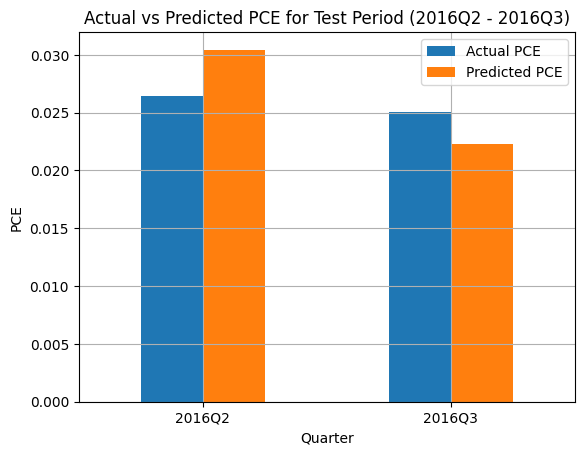

Accuracy metrics for the test period (2016Q3 - 2016Q4):
MAE: 0.0080
RMSE: 0.0086



<Figure size 1000x600 with 0 Axes>

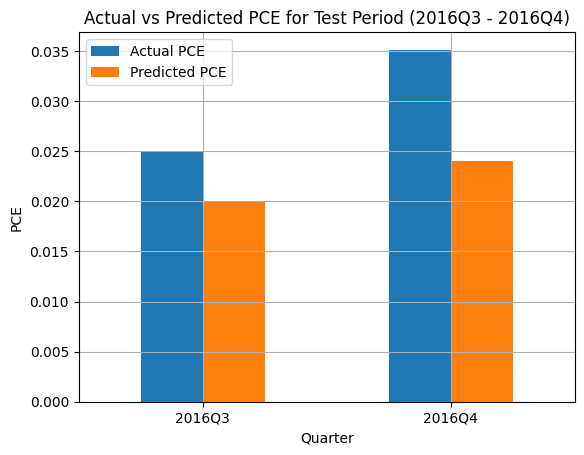

Accuracy metrics for the test period (2016Q4 - 2017Q1):
MAE: 0.0062
RMSE: 0.0065



<Figure size 1000x600 with 0 Axes>

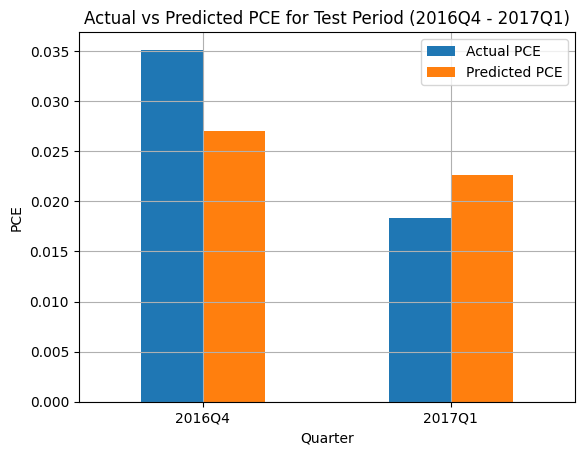

Accuracy metrics for the test period (2017Q1 - 2017Q2):
MAE: 0.0087
RMSE: 0.0087



<Figure size 1000x600 with 0 Axes>

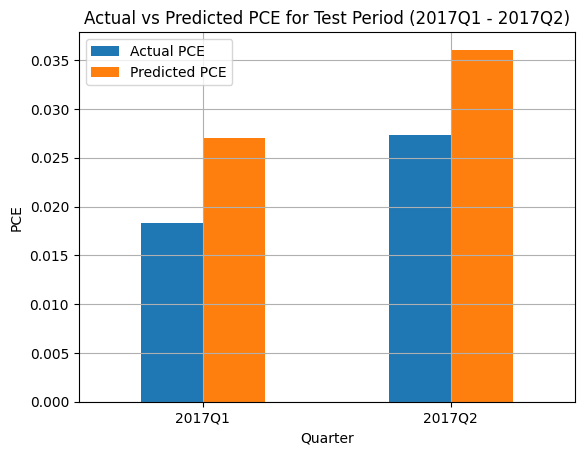

In [19]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Load dataset
var_df = final_proxy_dataset_for_validation.copy()

# Convert index to datetime and set the frequency to quarterly
var_df.index = pd.to_datetime(var_df.index) - pd.Timedelta(days=1)
var_df.index = var_df.index.to_period('Q')

# Handling Missing Values and Infinities
var_df.replace([np.inf, -np.inf], np.nan, inplace=True)

#drop rows with nan
var_df = var_df.dropna()

# # First, try to interpolate
# var_df.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)

# # Then use forward fill
# var_df.fillna(method='ffill', inplace=True)

# # Finally, use backward fill as the last resort
# var_df.fillna(method='bfill', inplace=True)

# Define test periods
test_periods = [
    ('2016Q2', '2016Q3'),
    ('2016Q3', '2016Q4'),
    ('2016Q4', '2017Q1'),
    ('2017Q1', '2017Q2'),

]

# Initialize lists to store MAE and RMSE for each test period
mae_list = []
rmse_list = []

# Loop over test periods
for start, end in test_periods:
    # Split the data for training and testing
    train_data = var_df[:start]
    test_data = var_df[start:end]

    # Fit the VAR model and determine the optimal lag order
    model = VAR(train_data)
    num_vars = len(train_data.columns)
    num_obs = len(train_data)
    maxlags_calculated = num_obs // (num_vars * 2)  # Calculate an appropriate maxlags value
    selected_order = model.select_order(maxlags=maxlags_calculated)
    optimal_lag = selected_order.selected_orders['aic']

    # Fitting the VAR model with the optimal lag
    results = model.fit(optimal_lag)

    # Out-of-sample forecast
    forecast = results.forecast(train_data.values[-optimal_lag:], steps=len(test_data))

    # Convert forecast to DataFrame and compare with test_data
    forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

    # Extracting actual and predicted values of 'PCE' for comparison
    actual_pce_test = test_data['PCE']
    predicted_pce_test = forecast_df['PCE']

    # Creating a DataFrame for comparison
    comparison_df_test = pd.DataFrame({'Actual PCE': actual_pce_test, 'Predicted PCE': predicted_pce_test})
    
    # Calculate MAE and RMSE
    mae = mean_absolute_error(actual_pce_test, predicted_pce_test)
    rmse = np.sqrt(mean_squared_error(actual_pce_test, predicted_pce_test))

    # Append to the list
    mae_list.append(mae)
    rmse_list.append(rmse)

    # Print accuracy metrics
    print(f"Accuracy metrics for the test period ({start} - {end}):")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}\n")


    # Plotting the actual vs predicted values for PCE in the test dataset
    plt.figure(figsize=(10, 6))
    comparison_df_test.plot(kind='bar')
    plt.title(f'Actual vs Predicted PCE for Test Period ({start} - {end})')
    plt.ylabel('PCE')
    plt.xlabel('Quarter')
    plt.xticks(rotation=0)
    plt.grid(True)
    plt.show()



In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluate the forecast using MAE and RMSE
for column in forecast_df.columns:
    mae = mean_absolute_error(test_data[column], forecast_df[column])
    rmse = np.sqrt(mean_squared_error(test_data[column], forecast_df[column]))
    print(f"{column} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Extracting actual and predicted values of 'PCE' for comparison
actual_pce_test = test_data['PCE']
predicted_pce_test = forecast_df['PCE']


Civilian Employment - MAE: 0.0274, RMSE: 0.0342
Tertiary_Sector_Employment - MAE: 0.0311, RMSE: 0.0396
Public_Sector_Employment - MAE: 0.0164, RMSE: 0.0165
CPI : All Items - MAE: 0.0108, RMSE: 0.0129
Ratio of Help Wanted/No. Unemployed - MAE: 0.0934, RMSE: 0.0951
Total Reserves of Depository Institutions - MAE: 0.1440, RMSE: 0.1440
Commercial and Industrial Loans - MAE: 0.0294, RMSE: 0.0344
Personal Cons. Expend.: Chain Index - MAE: 0.0111, RMSE: 0.0112
Real M2 Money Stock - MAE: 0.0169, RMSE: 0.0204
Initial Claims - MAE: 0.2322, RMSE: 0.3151
IP Index - MAE: 0.0181, RMSE: 0.0192
Output_Materials_Index - MAE: 0.0582, RMSE: 0.0743
IP_Prod_Equipment_Index - MAE: 0.0304, RMSE: 0.0410
Avg_Hourly_Earnings_Employment - MAE: 0.0156, RMSE: 0.0205
PCE - MAE: 0.0087, RMSE: 0.0087
